In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = 5

data = {
    'zpc': [],
    'tzddpc': []
}
data_time = {'zpc': [], 'tzddpc': []}

for file in ['zpc', 'tzddpc']:
    data[file] = np.load(f'./results/pulley.x{file}.npy')
    data_time[file] = np.load(f'./results/pulley.{file}_times.npy')


In [36]:
df = pd.DataFrame(data_time)
df.describe()


,zpc,tzddpc
count,5.000000,5.000000
mean,536.307297,10.993931
std,15.175678,2.571257
min,515.266261,9.233998
25%,532.284170,9.545219
50%,532.310519,10.143064
75%,547.370017,10.545229
max,554.305520,15.502147


{'whiskers': [<matplotlib.lines.Line2D at 0x7f99252e85d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9973d69990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99252e8990>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9973d69190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9973d61310>],
 'means': []}

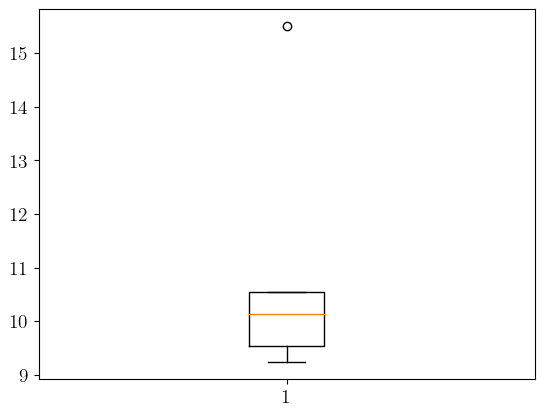

In [89]:
plt.boxplot(df['tzddpc'].T)

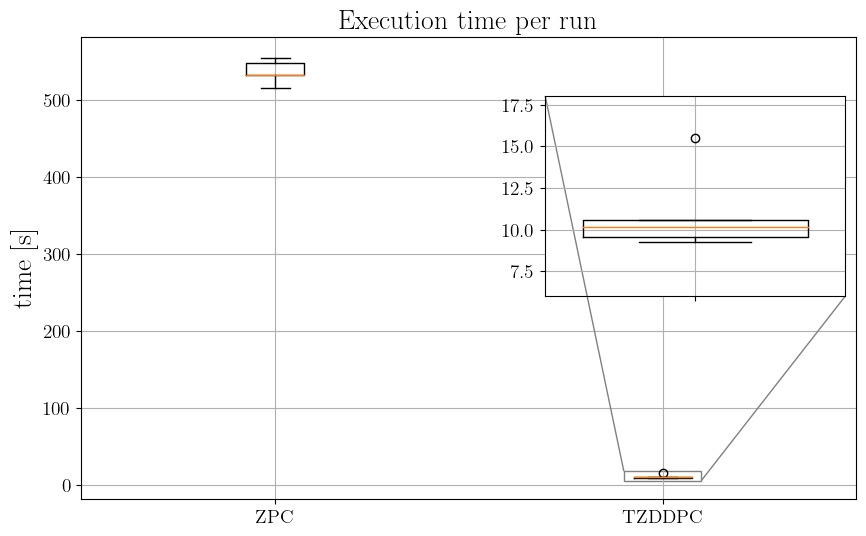

In [160]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax =plt.subplots(1, figsize=(10,6))
#df.#boxplot()
plt.boxplot(df.T, labels=['ZPC', 'TZDDPC'])
plt.ylabel('time [s]')
plt.title('Execution time per run')

plt.grid()
# Make the zoom-in plot:
axins = inset_axes(ax, 3, 2, loc='upper right', bbox_to_anchor=(0.9, 0.8),bbox_transform=ax.figure.transFigure) # zoom = 2
axins.boxplot(df.T)
axins.set_xlim(1.9, 2.1)
axins.set_ylim(6, 18)
plt.xticks(visible=False)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.grid()
plt.savefig('figures/pulley_complexity.pdf',bbox_inches='tight')


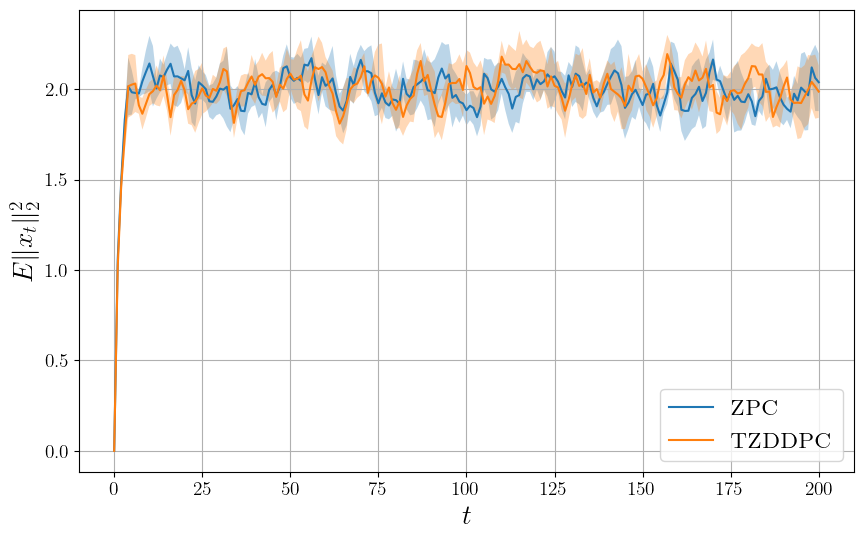

In [161]:
from plot_constants import *
TITLE_SIZE = 26
LEGEND_SIZE = 16
TICK_SIZE = 14
AXIS_TITLE = 20
AXIS_LABEL = 20
FONT_SIZE = TITLE_SIZE
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=AXIS_TITLE)     # fontsize of the axes title
plt.rc('axes', labelsize=AXIS_LABEL)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE)  # fontsize of the figure title
fig, ax =plt.subplots(1, figsize=(10,6))
N_sims = data['zpc'].shape[0]

mu_zpc = np.linalg.norm(data['zpc'], axis =2).mean(0)
std_zpc = np.linalg.norm(data['zpc'], axis =2).std(0)
ce_zpc = 1.96 * std_zpc / np.sqrt(N_sims)
plt.plot(mu_zpc, label=r'\textsc{ZPC}')
plt.fill_between(np.arange(len(mu_zpc)), mu_zpc - ce_zpc, mu_zpc + ce_zpc, alpha=0.3)

N_sims = data['tzddpc'].shape[0]
mu_tzddpc = np.linalg.norm(data['tzddpc'], axis =2).mean(0)
std_tzddpc = np.linalg.norm(data['tzddpc'], axis =2).std(0)
ce_tzddpc = 1.96 * std_tzddpc / np.sqrt(N_sims)
plt.plot(mu_tzddpc, label=r'\textsc{TZDDPC}')
plt.fill_between(np.arange(len(mu_tzddpc)), mu_tzddpc - ce_tzddpc, mu_tzddpc + ce_tzddpc, alpha=0.3)

plt.legend()
plt.xlabel('$t$')
plt.ylabel(r'$E \|x_t\|_2^2 $')
plt.grid()
plt.savefig('figures/pulley.pdf',bbox_inches='tight')
